# 1) Dataset Selection and Preliminary Research

In this project, I have chosen the **Social Media and Mental Health** dataset that I have downloaded from [Kaggle](https://www.kaggle.com/datasets/souvikahmed071/social-media-and-mental-health/data). This dataset is part of a research project for the Statistics Course STA-2101 at the University of Liberal Arts in Bangladesh. The data was gathered from a survey in which there were 481 participants. The topic that will be explored in this report is the impact of social media on mental health. Let's analyze the columns of the dataset.

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from scipy.stats import chi2_contingency, ttest_ind, pearsonr

In [3]:
media_health = pd.read_csv("smmh.csv")
print(media_health.columns)
print (media_health.dtypes)

Index(['Timestamp', '1. What is your age?', '2. Gender',
       '3. Relationship Status', '4. Occupation Status',
       '5. What type of organizations are you affiliated with?',
       '6. Do you use social media?',
       '7. What social media platforms do you commonly use?',
       '8. What is the average time you spend on social media every day?',
       '9. How often do you find yourself using Social media without a specific purpose?',
       '10. How often do you get distracted by Social media when you are busy doing something?',
       '11. Do you feel restless if you haven't used Social media in a while?',
       '12. On a scale of 1 to 5, how easily distracted are you?',
       '13. On a scale of 1 to 5, how much are you bothered by worries?',
       '14. Do you find it difficult to concentrate on things?',
       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?',
       '16. Following the previous question, 

* The timestamp variable represents the time when the survey response has been received. 
* The variables numbered from 1. to 7. gather general data about a participant. 
* The remaining variables numbered from 8. to 20. hold ratings about social media's impact on the participants.

In [4]:
media_health.shape

(481, 21)

The dataset had 481 rows and 21 columns

# 2) Data Cleaning and Preprocessing

### Renaming cells

The variable names are quite long as they were initially survey questions. We will rename them into shorter and descriptive columns.

In [5]:
columns_d = {
    "1. What is your age?": "Age",
    "2. Gender": "Gender",
    "3. Relationship Status": "Relationship Status",
    "4. Occupation Status": "Occupation",
    "5. What type of organizations are you affiliated with?": "Affiliated Organizations",
    "6. Do you use social media?": "Social Media Use",
    "7. What social media platforms do you commonly use?": "Commonly Used Social Media Platforms",
    "8. What is the average time you spend on social media every day?": "Average Daily Social Media Usage",
    "9. How often do you find yourself using Social media without a specific purpose?": "Frequency of Unpurposeful Social Media Usage",
    "10. How often do you get distracted by Social media when you are busy doing something?": "Frequency of Social Media Distraction",
    "11. Do you feel restless if you haven't used Social media in a while?": "Restlessness Due to Lack of Social Media Usage",
    "12. On a scale of 1 to 5, how easily distracted are you?": "Level of Distraction",
    "13. On a scale of 1 to 5, how much are you bothered by worries?": "Level of Botheration by Worries",
    "14. Do you find it difficult to concentrate on things?": "Difficulty in Concentrating",
    "15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?": "Frequency of Social Media Comparison",
    "16. Following the previous question, how do you feel about these comparisons, generally speaking?": "Feelings About Social Media Comparisons",
    "17. How often do you look to seek validation from features of social media?": "Frequency of Seeking Validation on Social Media",
    "18. How often do you feel depressed or down?": "Frequency of Feeling Depressed or Down",
    "19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?": "Frequency of Interest Fluctuation",
    "20. On a scale of 1 to 5, how often do you face issues regarding sleep?": "Frequency of Sleep Issues"
}

media_health = media_health.rename(columns = columns_d)


### Handling missing values
The command below will return the number of missing values in each column of the dataset.

In [6]:
media_health.isnull().sum()

Timestamp                                           0
Age                                                 0
Gender                                              0
Relationship Status                                 0
Occupation                                          0
Affiliated Organizations                           30
Social Media Use                                    0
Commonly Used Social Media Platforms                0
Average Daily Social Media Usage                    0
Frequency of Unpurposeful Social Media Usage        0
Frequency of Social Media Distraction               0
Restlessness Due to Lack of Social Media Usage      0
Level of Distraction                                0
Level of Botheration by Worries                     0
Difficulty in Concentrating                         0
Frequency of Social Media Comparison                0
Feelings About Social Media Comparisons             0
Frequency of Seeking Validation on Social Media     0
Frequency of Feeling Depress

The result shows that the column **Affiliated Organizations** has 30 null values in the dataset. Those null values are represented as **N/A**. This might be due to the fact that when replying to the survey questions, participants were given the option to not add an Affiliated organizations. In this sense, we do not need to delete the null values as it is part of the dataset, we will replace them with the string **Not specified**. We will notice that after running the same command above. The data set will not present any null values anymore.

In [37]:
media_health['Affiliated Organizations'].fillna("Not specified", inplace=True)
media_health.isnull().sum()

Timestamp                                          0
Age                                                0
Gender                                             0
Relationship Status                                0
Occupation                                         0
Affiliated Organizations                           0
Social Media Use                                   0
Commonly Used Social Media Platforms               0
Average Daily Social Media Usage                   0
Frequency of Unpurposeful Social Media Usage       0
Frequency of Social Media Distraction              0
Restlessness Due to Lack of Social Media Usage     0
Level of Distraction                               0
Level of Botheration by Worries                    0
Difficulty in Concentrating                        0
Frequency of Social Media Comparison               0
Feelings About Social Media Comparisons            0
Frequency of Seeking Validation on Social Media    0
Frequency of Feeling Depressed or Down        

In [8]:
media_health['Affiliated Organizations'].value_counts()

University                        239
Private                            60
School                             44
Company                            30
Not given                          30
University, Company                19
University, Private                16
School, University                  9
Company, Private                    7
Goverment                           6
University, Company, Private        5
School, University, Private         4
University, N/A                     3
University, Goverment               2
School, Company                     2
School, N/A                         2
School, Private                     1
University, Goverment, Private      1
University, Company, Goverment      1
Name: Affiliated Organizations, dtype: int64

The command above shows the count of each NON NULL values in the **Affiliated Organizations** We notice that there are two odd values which are University, N/A and School, N/A.

We cannot predict the values that should replace N/A, so we will assume that only the first word should stay in those cell.
The below commands will replace University, N/A by University and School, N/A by School.

In [9]:
media_health['Affiliated Organizations'].replace("University, N/A", "University", inplace=True)
media_health['Affiliated Organizations'].replace("School, N/A", "School", inplace=True)
print(media_health['Affiliated Organizations'].value_counts())

University                        242
Private                            60
School                             46
Not given                          30
Company                            30
University, Company                19
University, Private                16
School, University                  9
Company, Private                    7
Goverment                           6
University, Company, Private        5
School, University, Private         4
University, Goverment               2
School, Company                     2
University, Goverment, Private      1
School, Private                     1
University, Company, Goverment      1
Name: Affiliated Organizations, dtype: int64


We can see that we have removed the irregular values and that the number of occurance of University and School has respectively increased by 3 and 2.

### Handling data types

#### Gender

In [10]:
media_health.dtypes

Timestamp                                           object
Age                                                float64
Gender                                              object
Relationship Status                                 object
Occupation                                          object
Affiliated Organizations                            object
Social Media Use                                    object
Commonly Used Social Media Platforms                object
Average Daily Social Media Usage                    object
Frequency of Unpurposeful Social Media Usage         int64
Frequency of Social Media Distraction                int64
Restlessness Due to Lack of Social Media Usage       int64
Level of Distraction                                 int64
Level of Botheration by Worries                      int64
Difficulty in Concentrating                          int64
Frequency of Social Media Comparison                 int64
Feelings About Social Media Comparisons              int

We will address the **Gender** column which has been assigned **object** as type. Let's look at all the non null values in the Gender column.

In [11]:
media_health['Gender'].value_counts()

Female                 263
Male                   211
Nonbinary                1
Non-binary               1
NB                       1
unsure                   1
Trans                    1
Non binary               1
There are others???      1
Name: Gender, dtype: int64

Firsly, we will delete the row with the value **There are others???** as the answer is not appropriate. 

In [12]:
media_health.drop(media_health.loc[media_health['Gender'] == 'There are others???'].index, inplace=True)
media_health['Gender'].value_counts()

Female         263
Male           211
Nonbinary        1
Non-binary       1
NB               1
unsure           1
Trans            1
Non binary       1
Name: Gender, dtype: int64

Then, we will categorize all other values than Female and Male as **Others**

In [13]:
media_health.replace('Nonbinary ','Others', inplace=True)
media_health.replace('Non-binary','Others', inplace=True)
media_health.replace('NB','Others', inplace=True)
media_health.replace('unsure ','Others', inplace=True)
media_health.replace('Trans','Others', inplace=True)
media_health.replace('Non binary ','Others', inplace=True)

media_health['Gender'].value_counts()

Female    263
Male      211
Others      6
Name: Gender, dtype: int64

Now, the genders are either Female, Male or Others. Let's transform all the male values to 0, female to 1, and others to 2.

In [14]:
media_health.loc[media_health["Gender"] == "Male", "Gender"] = 0
media_health.loc[media_health["Gender"] ==  "Female", "Gender"] = 1
media_health.loc[media_health["Gender"] == "Others", "Gender"] = 2

media_health["Gender"] = media_health["Gender"].astype('int64')
media_health.dtypes

Timestamp                                           object
Age                                                float64
Gender                                               int64
Relationship Status                                 object
Occupation                                          object
Affiliated Organizations                            object
Social Media Use                                    object
Commonly Used Social Media Platforms                object
Average Daily Social Media Usage                    object
Frequency of Unpurposeful Social Media Usage         int64
Frequency of Social Media Distraction                int64
Restlessness Due to Lack of Social Media Usage       int64
Level of Distraction                                 int64
Level of Botheration by Worries                      int64
Difficulty in Concentrating                          int64
Frequency of Social Media Comparison                 int64
Feelings About Social Media Comparisons              int

#### Age

We have noticed that the column Age should be of type integer and not float. Let's address it.

In [15]:
media_health["Age"] = media_health["Age"].astype("int64")
media_health.dtypes

Timestamp                                          object
Age                                                 int64
Gender                                              int64
Relationship Status                                object
Occupation                                         object
Affiliated Organizations                           object
Social Media Use                                   object
Commonly Used Social Media Platforms               object
Average Daily Social Media Usage                   object
Frequency of Unpurposeful Social Media Usage        int64
Frequency of Social Media Distraction               int64
Restlessness Due to Lack of Social Media Usage      int64
Level of Distraction                                int64
Level of Botheration by Worries                     int64
Difficulty in Concentrating                         int64
Frequency of Social Media Comparison                int64
Feelings About Social Media Comparisons             int64
Frequency of S

#### Average Daily Social Media Usage

We will convert the values from string to integers
* Less than 1 hour will be set to 0
* Between 1 and 2 hours will be set to 1
* Between 2 and 3 hours will be set to 2
* Between 3 and 4 hours will be set to 3
* Between 4 and 5 hours will be set to 4
* More than 5 hours will be set to 5

In [60]:
media_health.loc[media_health['Average Daily Social Media Usage'] == 'Less than an Hour', 'Average Daily Social Media Usage'] = 0
media_health.loc[media_health['Average Daily Social Media Usage'] == 'Between 1 and 2 hours', 'Average Daily Social Media Usage'] = 1
media_health.loc[media_health['Average Daily Social Media Usage'] == 'Between 2 and 3 hours', 'Average Daily Social Media Usage'] = 2
media_health.loc[media_health['Average Daily Social Media Usage'] == 'Between 3 and 4 hours', 'Average Daily Social Media Usage'] = 3
media_health.loc[media_health['Average Daily Social Media Usage'] == 'Between 4 and 5 hours', 'Average Daily Social Media Usage'] = 4
media_health.loc[media_health['Average Daily Social Media Usage'] == 'More than 5 hours', 'Average Daily Social Media Usage'] = 5


media_health["Average Daily Social Media Usage"] = media_health["Average Daily Social Media Usage"].astype("int64")

print(media_health['Average Daily Social Media Usage'])
print(media_health.dtypes)

0      2
1      5
2      3
3      5
4      2
      ..
476    2
477    1
478    2
479    2
480    0
Name: Average Daily Social Media Usage, Length: 480, dtype: int64
Timestamp                                          object
Age                                                 int64
Gender                                              int64
Relationship Status                                object
Occupation                                         object
Affiliated Organizations                           object
Social Media Use                                   object
Commonly Used Social Media Platforms               object
Average Daily Social Media Usage                    int64
Frequency of Unpurposeful Social Media Usage        int64
Frequency of Social Media Distraction               int64
Restlessness Due to Lack of Social Media Usage      int64
Level of Distraction                                int64
Level of Botheration by Worries                     int64
Difficulty in Concentra

### Creating a new column to score social media impact's score

Based on the ratings received from participants (1-5), we are going to create a new column called **Impact Score** that will be the sum of all ratings received per each respondent concerning the impact of social media. 
However, we will need to adjust the score received in the column **Feelings About Social Media Comparisons** An initial score of 1 meant a negative feeling about social media comparison. However, a higher social media impact score is supposed to be bad in this scenario. Therefore we need to adjust the data in that column first so it reflects the goals of this new column **Impact Score** Positive or neutral answers (3,4,5) will be set as 0 and negative feedback (1,2) will be set to a higher number.

In [40]:
media_health.loc[media_health['Feelings About Social Media Comparisons'] == 5, 'Feelings About Social Media Comparisons'] = 0
media_health.loc[media_health['Feelings About Social Media Comparisons'] == 4, 'Feelings About Social Media Comparisons'] = 0
media_health.loc[media_health['Feelings About Social Media Comparisons'] == 3, 'Feelings About Social Media Comparisons'] = 0
media_health.loc[media_health['Feelings About Social Media Comparisons'] == 2, 'Feelings About Social Media Comparisons'] = 3
media_health.loc[media_health['Feelings About Social Media Comparisons'] == 1, 'Feelings About Social Media Comparisons'] = 5

In [41]:
impact_variables = ["Frequency of Unpurposeful Social Media Usage", "Frequency of Social Media Distraction", "Frequency of Social Media Distraction", "Restlessness Due to Lack of Social Media Usage", "Level of Distraction", "Level of Botheration by Worries", "Difficulty in Concentrating", "Frequency of Social Media Comparison", "Feelings About Social Media Comparisons", "Frequency of Seeking Validation on Social Media", "Frequency of Feeling Depressed or Down", "Frequency of Interest Fluctuation", "Frequency of Sleep Issues"]

media_health["Impact Score"] = media_health[impact_variables].sum(axis=1)

media_health

,Timestamp,Age,Gender,Relationship Status,Occupation,Affiliated Organizations,Social Media Use,Commonly Used Social Media Platforms,Average Daily Social Media Usage,Frequency of Unpurposeful Social Media Usage,...,Level of Distraction,Level of Botheration by Worries,Difficulty in Concentrating,Frequency of Social Media Comparison,Feelings About Social Media Comparisons,Frequency of Seeking Validation on Social Media,Frequency of Feeling Depressed or Down,Frequency of Interest Fluctuation,Frequency of Sleep Issues,Impact Score
0,4/18/2022 19:18:47,21,0,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",2,5,...,5,2,5,2,0,2,5,4,5,43
1,4/18/2022 19:19:28,21,1,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",5,4,...,4,5,4,5,0,1,5,4,5,45
2,4/18/2022 19:25:59,21,1,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",3,3,...,2,5,4,3,0,1,4,2,5,34
3,4/18/2022 19:29:43,21,1,Single,University Student,University,Yes,"Facebook, Instagram",5,4,...,3,5,3,5,0,2,4,3,2,36
4,4/18/2022 19:33:31,21,1,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",2,3,...,4,5,5,3,0,3,4,4,1,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5/21/2022 23:38:28,24,0,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",2,3,...,4,3,4,4,0,4,3,4,4,44
477,5/22/2022 0:01:05,26,1,Married,Salaried Worker,University,Yes,"Facebook, YouTube",1,2,...,3,4,4,4,0,4,4,4,1,34
478,5/22/2022 10:29:21,29,1,Married,Salaried Worker,University,Yes,"Facebook, YouTube",2,3,...,3,2,3,3,0,4,2,2,2,34
479,7/14/2022 19:33:47,21,0,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",2,2,...,3,3,2,2,0,4,4,5,4,37


### Checking for duplicate rows

In [42]:
duplicate_rows = media_health[media_health.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Timestamp, Age, Gender, Relationship Status, Occupation, Affiliated Organizations, Social Media Use, Commonly Used Social Media Platforms, Average Daily Social Media Usage, Frequency of Unpurposeful Social Media Usage, Frequency of Social Media Distraction, Restlessness Due to Lack of Social Media Usage, Level of Distraction, Level of Botheration by Worries, Difficulty in Concentrating, Frequency of Social Media Comparison, Feelings About Social Media Comparisons, Frequency of Seeking Validation on Social Media, Frequency of Feeling Depressed or Down, Frequency of Interest Fluctuation, Frequency of Sleep Issues, Impact Score]
Index: []

[0 rows x 22 columns]


There are no duplicate rows.

#### Outliers detection

We can use box plot visualizations to determine which variables contain outliers in out dataset. We will temporarly shorten the label description to avoid text overlapping.

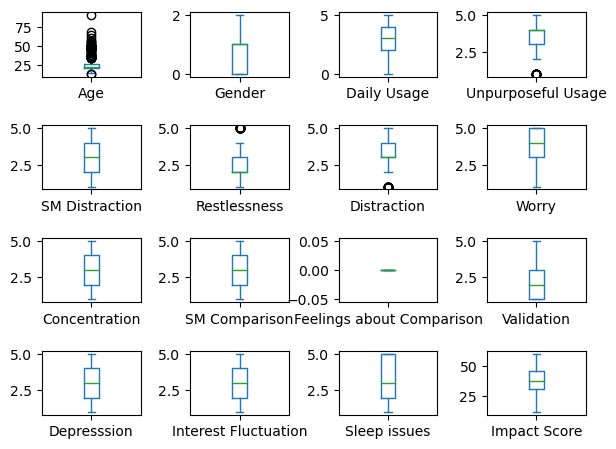

In [43]:
abbreviations = {
    'Age': 'Age',
    'Gender': 'Gender',
    'Social Media Use':'SM Use',
    'Commonly Used Social Media Platforms': 'Platforms',
    'Average Daily Social Media Usage':'Daily Usage',
    'Frequency of Unpurposeful Social Media Usage':'Unpurposeful Usage',
    'Frequency of Social Media Distraction':'SM Distraction',
    'Restlessness Due to Lack of Social Media Usage':'Restlessness',
    'Level of Distraction':'Distraction',
    'Level of Botheration by Worries':'Worry',
    'Difficulty in Concentrating':'Concentration',
    'Frequency of Social Media Comparison': 'SM Comparison',
    'Feelings About Social Media Comparisons': 'Feelings about Comparison',
    'Frequency of Seeking Validation on Social Media': 'Validation',
    'Frequency of Feeling Depressed or Down': 'Depresssion',
    'Frequency of Interest Fluctuation': 'Interest Fluctuation',
    'Frequency of Sleep Issues': 'Sleep issues',    
}

media_health_temp = media_health.rename(columns=abbreviations)

media_health_temp.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.75, wspace=0.50)

We notice from the above visualization that the variables: **Age**, **Frequency of Unpurposeful Social Media Usage** , **Restlessness Due to Lack of Social Media Usage** and **Level of Distraction** present outliers.
However, in our dataset the outliers carry important information when looking for meaninghful insights. Those outliers are also valid data points that resulted from the input and ratings of the participants. That's why we will keep and not transform or remove them.

# 3) Exploratory Data Analysis

### Distribution of key variables with histograms

#### Age

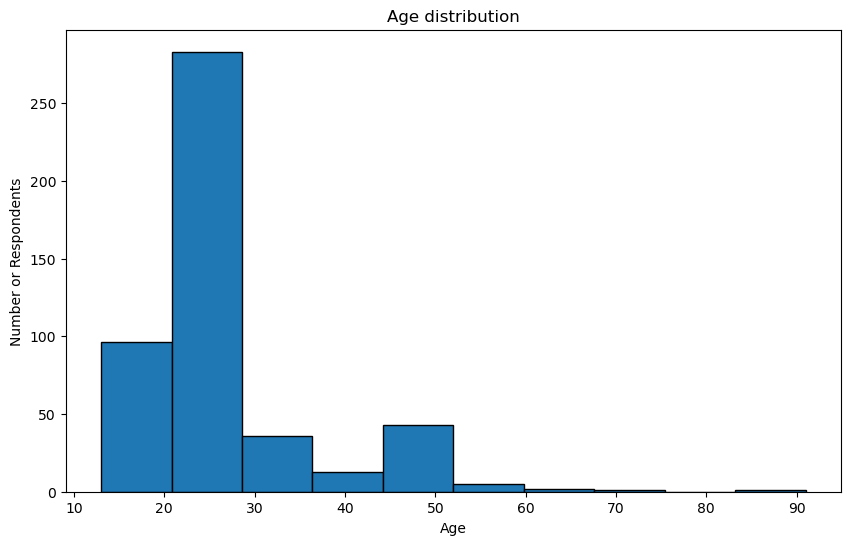

In [44]:
plt.figure(figsize=(10, 6))
plt.hist(media_health['Age'], bins=10, edgecolor='k')
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Number or Respondents')
plt.show()

We notice from the above visualization that most participants are younger than 30. The majority of participants are aged between 20 and 30. We have fewer participants above 30.

#### Gender 

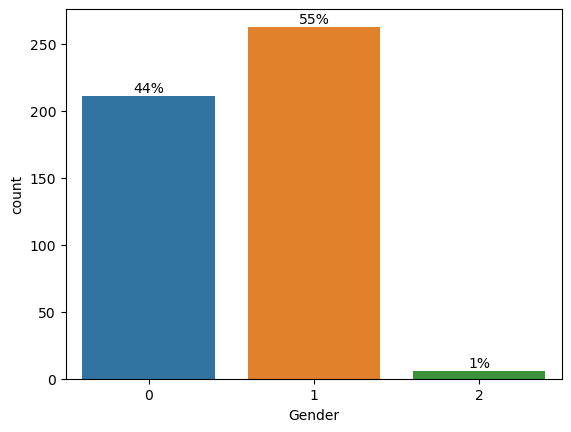

In [45]:
total=float(len(media_health))
ax = sn.countplot(x="Gender", data=media_health) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height + 3,'{0:.0%}'.format(height/total),ha="center")

55% of the participants are female, 44% are male, and only an entremely small percentage of 1% are other genders. That percentage of other genders might be too small for statistical calculation.

#### Average Daily Social Media Usage

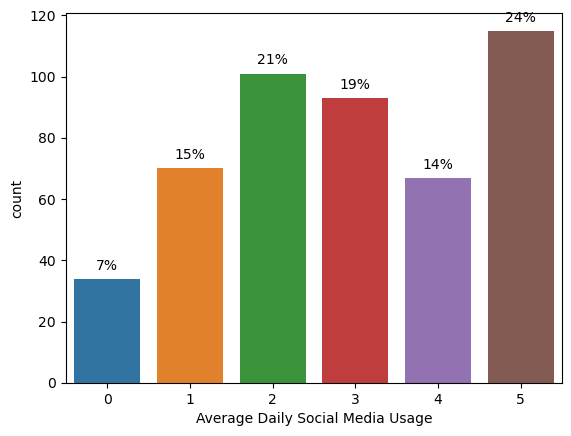

In [46]:
total=float(len(media_health))
ax = sn.countplot(x="Average Daily Social Media Usage", data=media_health) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height + 3,'{0:.0%}'.format(height/total),ha="center")

Less than 7% of the participants use social media for less than an hour a day. The remaining categories were selected by at least 14% of the participants. The majority of the participants (24%) use social media more than 5 hours a day.

### Relationships between variables

We will look at different variables to analyze the relationship between them.

#### Relationship between Age and Frequency of Seeking Validation on Social Media

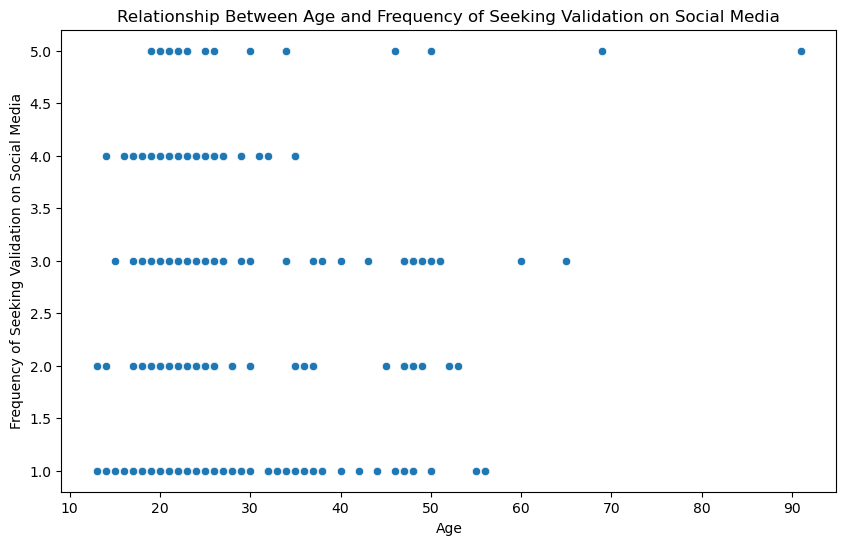

In [47]:
plt.figure(figsize=(10, 6))
sn.scatterplot(x='Age', y='Frequency of Seeking Validation on Social Media', data=media_health)
plt.title('Relationship Between Age and Frequency of Seeking Validation on Social Media')
plt.xlabel('Age')
plt.ylabel('Frequency of Seeking Validation on Social Media')
plt.show()

This scatterplot suggests a negative correlation between age and the frequency of seeking validation on social media. We notice that participants less than 30 years old tend to seek more validation than participants older than 30.

#### Relationship between average usage of social media and Difficulty in Concentrating

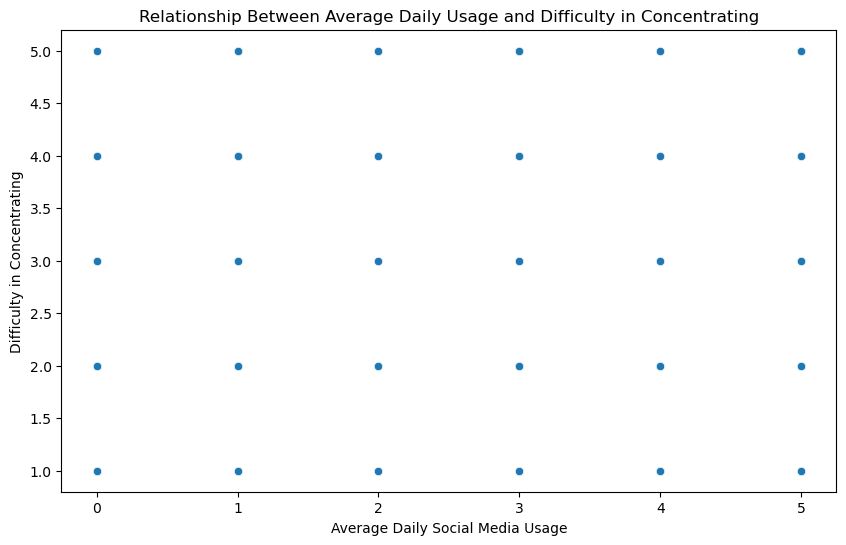

In [48]:
plt.figure(figsize=(10, 6))
sn.scatterplot(x='Average Daily Social Media Usage', y='Difficulty in Concentrating', data=media_health)
plt.title('Relationship Between Average Daily Usage and Difficulty in Concentrating')
plt.xlabel('Average Daily Social Media Usage')
plt.ylabel('Difficulty in Concentrating')
plt.show()

We can notice a positive correlation between average daily social media usage and difficulty in concentrating. The data points are scattered across the plot, showing various levels of social media usage and difficulty concentrating among the participants.

### Correlation plot

In [49]:
media_health.corr(numeric_only=True)

,Age,Gender,Average Daily Social Media Usage,Frequency of Unpurposeful Social Media Usage,Frequency of Social Media Distraction,Restlessness Due to Lack of Social Media Usage,Level of Distraction,Level of Botheration by Worries,Difficulty in Concentrating,Frequency of Social Media Comparison,Feelings About Social Media Comparisons,Frequency of Seeking Validation on Social Media,Frequency of Feeling Depressed or Down,Frequency of Interest Fluctuation,Frequency of Sleep Issues,Impact Score
Age,1.000000,-0.134974,-0.361333,-0.224916,-0.231384,-0.124569,-0.223723,-0.291707,-0.264745,-0.092456,NaN,-0.039331,-0.306162,-0.242529,-0.163038,-0.308398
Gender,-0.134974,1.000000,0.215704,0.059208,0.078414,0.117202,0.095395,0.131022,0.087545,0.117992,NaN,0.056374,0.136031,0.148413,-0.032241,0.135046
Average Daily Social Media Usage,-0.361333,0.215704,1.000000,0.393191,0.378661,0.397034,0.339983,0.333709,0.322780,0.200647,NaN,0.110442,0.336852,0.295767,0.179545,0.461752
Frequency of Unpurposeful Social Media Usage,-0.224916,0.059208,0.393191,1.000000,0.463131,0.358841,0.365111,0.254884,0.289044,0.148129,NaN,0.144875,0.317977,0.360561,0.262446,0.547580
Frequency of Social Media Distraction,-0.231384,0.078414,0.378661,0.463131,1.000000,0.511107,0.605970,0.350614,0.529128,0.288675,NaN,0.271599,0.385813,0.392603,0.260391,0.767895
Restlessness Due to Lack of Social Media Usage,-0.124569,0.117202,0.397034,0.358841,0.511107,1.000000,0.512200,0.357884,0.472003,0.321737,NaN,0.248377,0.338191,0.390355,0.173713,0.654573
Level of Distraction,-0.223723,0.095395,0.339983,0.365111,0.605970,0.512200,1.000000,0.471447,0.664695,0.286363,NaN,0.174037,0.414835,0.484159,0.296877,0.741243
Level of Botheration by Worries,-0.291707,0.131022,0.333709,0.254884,0.350614,0.357884,0.471447,1.000000,0.547442,0.416538,NaN,0.208223,0.585842,0.428641,0.323204,0.674712
Difficulty in Concentrating,-0.264745,0.087545,0.322780,0.289044,0.529128,0.472003,0.664695,0.547442,1.000000,0.371220,NaN,0.241939,0.510734,0.503315,0.354957,0.766505
Frequency of Social Media Comparison,-0.092456,0.117992,0.200647,0.148129,0.288675,0.321737,0.286363,0.416538,0.371220,1.000000,NaN,0.417483,0.419531,0.374820,0.194557,0.584357


The table above summarizes the associations between the numerical variables in the media_health data set.

We notice a moderate positive correlation between 
* **Average Daily Social Media Usage** and **Frequency of Unpurposeful Social Media Usage**
* **Average Daily Social Media Usage** and **Frequency of Social Media Distraction**
* **Average Daily Social Media Usage** and **Restlessness Due to Lack of Social Media Usage**
* **Average Daily Social Media Usage** and **Level of Distraction**
* **Average Daily Social Media Usage** and **Level of Botheration by Worries**	
* **Average Daily Social Media Usage** and **Difficulty in Concentrating**
* **Average Daily Social Media Usage** and **Frequency of Feeling Depressed or Down**
* **Average Daily Social Media Usage** and **Frequency of Interest Fluctuation**

That might potentially mean that when the daily social media usage duration increases, the intensity of the impact of the other variables increases.

Moreover, we notice a negative correlation between the **Age** variable and the other variables. This might potentially due to the fact that the older the participants are, the less their social media involvement and impact are.


#### Covariance matrix

<Axes: >

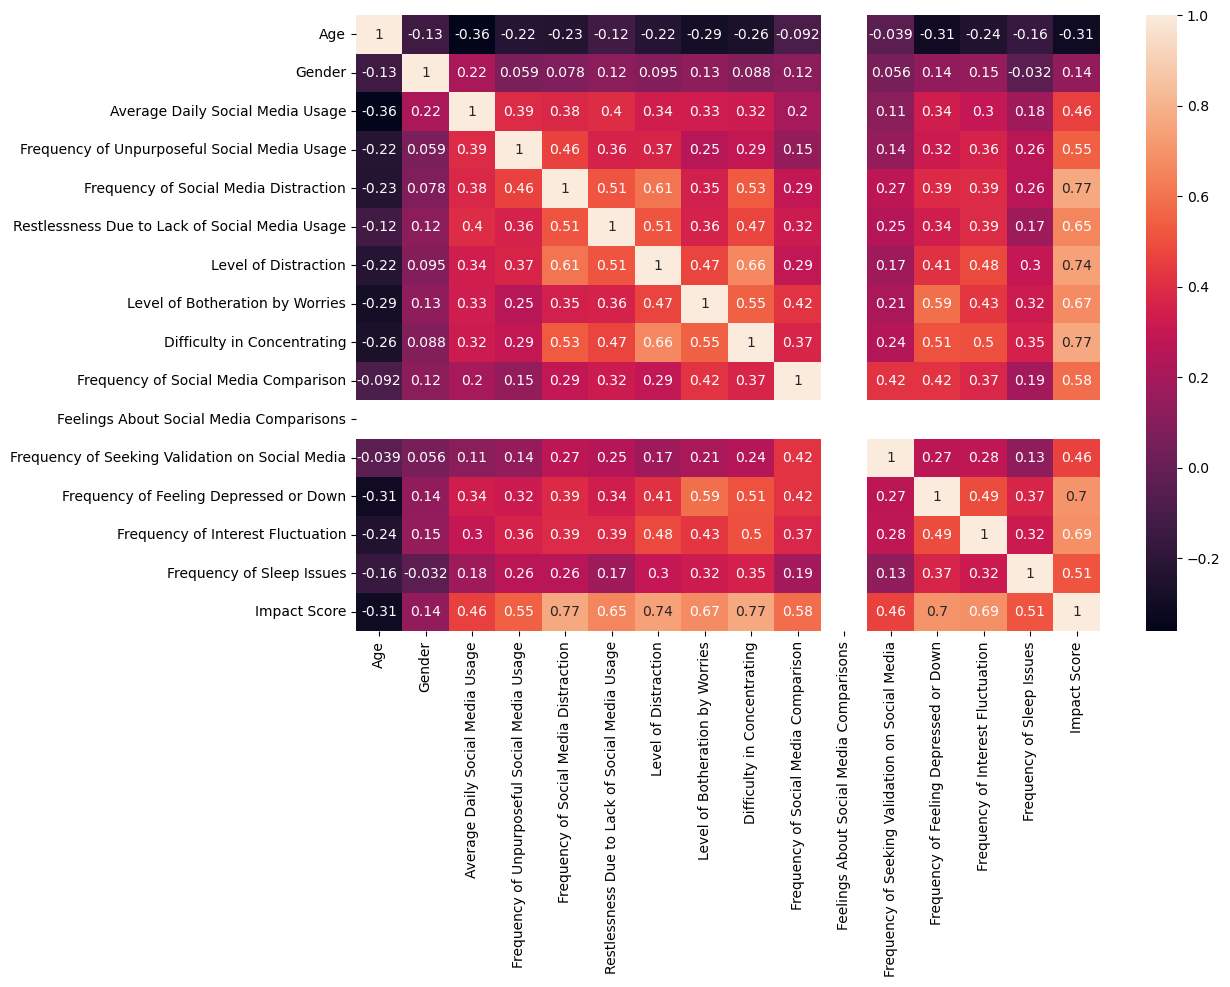

In [50]:
plt.figure(figsize=(12, 8))
correlations = media_health.corr(numeric_only=True)
sn.heatmap(correlations, annot=True)

The above heatmap showcases the same results as the previous visualization, but the color of each cell depends on the intensity of the correlation. We can see from the heatmap that
* **Age** has a negative correlation with the rest of the variables suggesting less interest/involvement in social media as participants get older.
* **Gender** has a positive and some negative weak correlation with the rest of the variables.
* **Average Daily Social Media Usage** has a medium correlation with most of the variables used to define the consequences of social media consumption.
* **Impact Score** has mostly a high positive correlation with the variables used to measure the consequences of social media on the participants.

### Group comparisons using box plots and bar charts

#### Distribution of Feeling depressed or down accross average daily social media usage

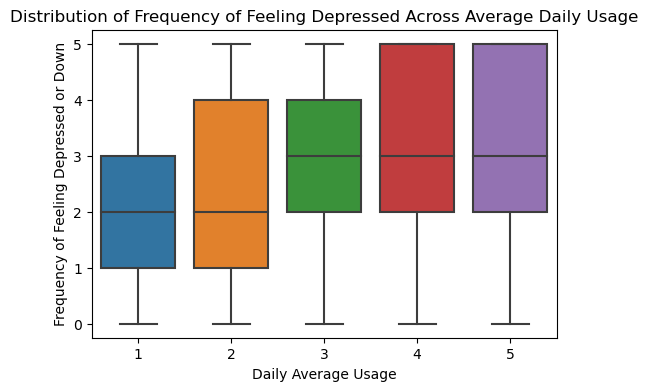

In [61]:
plt.figure(figsize=(6, 4))
sn.boxplot(x='Frequency of Feeling Depressed or Down', y='Average Daily Social Media Usage', data=media_health)
plt.title('Distribution of Frequency of Feeling Depressed Across Average Daily Usage')
plt.xlabel('Daily Average Usage')
plt.ylabel('Frequency of Feeling Depressed or Down')
plt.show()

We can see from this box plot that as the frequency of daily social media usage increase, the frequency of feeling depressed or down increases as well.

#### Gender-based differences in frequency of social media comparison

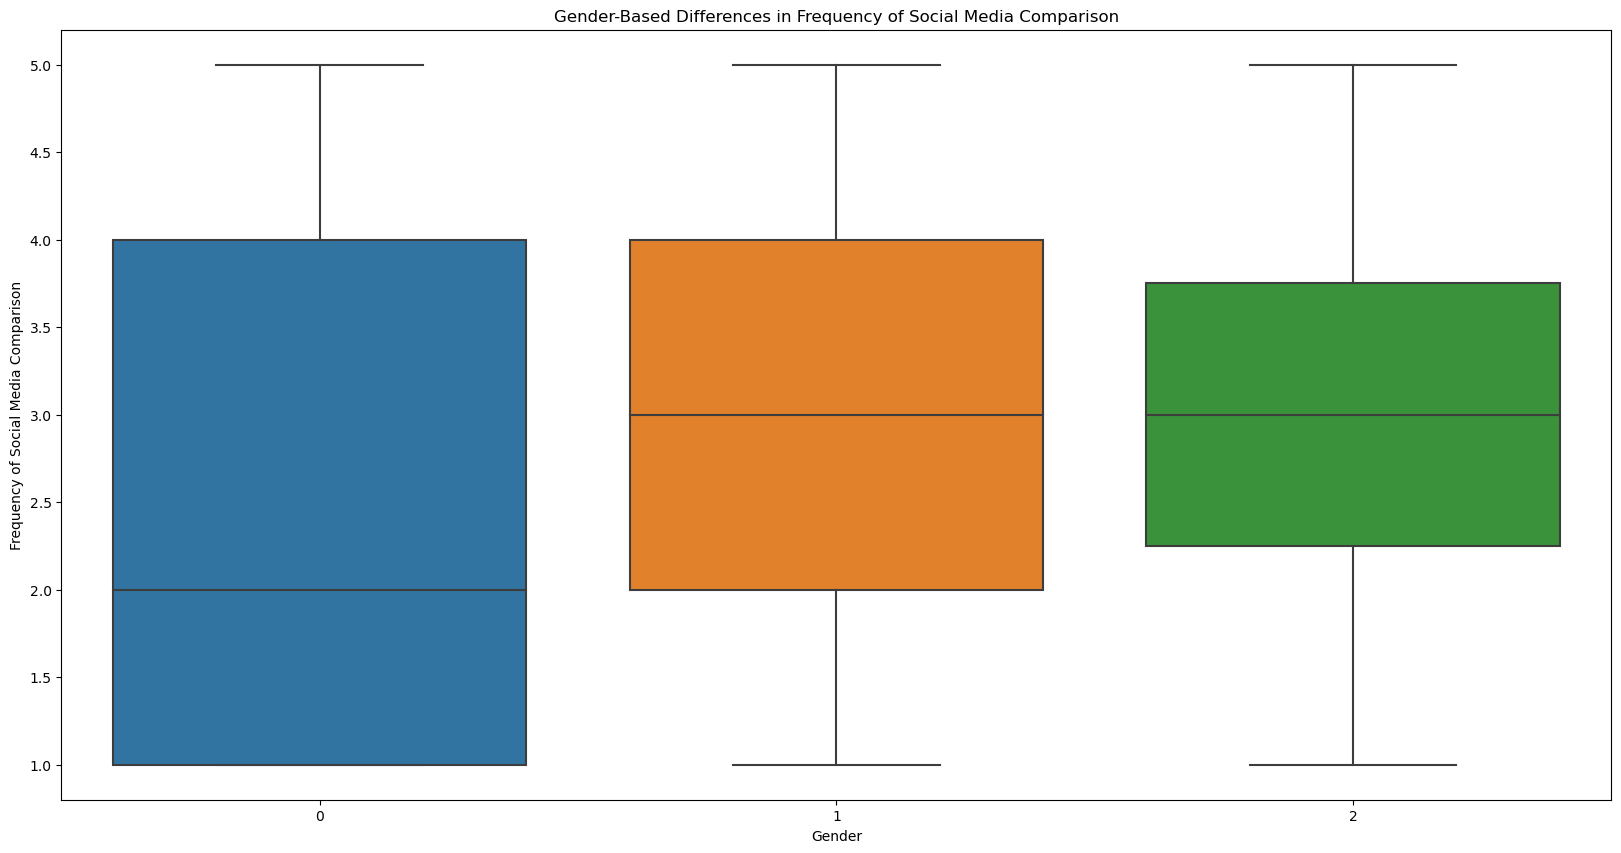

In [52]:
plt.figure(figsize=(20, 10))
sn.boxplot(x='Gender', y='Frequency of Social Media Comparison', data=media_health)
plt.title('Gender-Based Differences in Frequency of Social Media Comparison')
plt.xlabel('Gender')
plt.ylabel('Frequency of Social Media Comparison')
plt.show()

This visualization infers that the male participants are more prone to comparison on social media apps than the female participants and other genders.

# 4) Statistical Inference

### Hypotheses based on the EDA findings

Based on the EDA findings, we formulate the following hypotheses:

1) Frequent social media usage negatively impact an individual's mental health.

2) Younger age groups are more likely to experience mental health issues related to social media usage than older age groups.

We will look into chi-square tests and Pearson correlation tests to conduct statistical tests.

### Statistical analysis

#### 1) chi-square tests

#### Hypothesis 1

In [62]:
usage_table = pd.crosstab(media_health['Average Daily Social Media Usage'], media_health['Impact Score'])
chi2, p, dof, expected = chi2_contingency(usage_table.values)
print(f"chi-square value: {chi2}")
print(f"p-value: {p}")

chi-square value: 365.90142831706726
p-value: 9.387084966616193e-08


A high chi-square value suggests an association between two variables. The small p-value of 9.387084966616193e-08 is smaller than 0.05, therefore we reject the null hypothesis that the variables are independent.

#### Hypothesis 2

In [63]:
age_table = pd.crosstab(media_health['Age'], media_health['Impact Score'])
chi2, p, dof, expected = chi2_contingency(age_table.values)
print(f"chi-square value: {chi2}")
print(f"p-value: {p}")

chi-square value: 2778.9259716504453
p-value: 7.355406176285654e-24


A high chi-square value suggest an association between two variables. A high chi-square value suggests an association between two variables. The small p-value of 7.355406176285654e-24 is smaller than 0.05, therefore we reject the null hypothesis that the variables are independent.

#### 2) Pearson Correlation test

#### Hypothesis 1

In [55]:
correlation, p_value = pearsonr(media_health['Average Daily Social Media Usage'], media_health['Impact Score'])
print(f"correlation: {correlation}")
print(f"p-value: {p_value}")

correlation: 0.46175216322304685
p-value: 1.0090345187994365e-26


The extremely small p-value of 6.678189226434033e-25 is smaller than 0.05. We can reject the null hypothesis. The intensity of social media usage is associated with the mental health of the participants.

##### Hypothesis 2

In [56]:
correlation, p_value = pearsonr(media_health['Age'], media_health['Impact Score'])
print(f"correlation: {correlation}")
print(f"p-value: {p_value}")

correlation: -0.3083977805016862
p-value: 4.9108196410012036e-12


The extremely small p-value of 5.808799225903146e-12 is smaller than 0.05. We can also reject the null hypothesis. The age of a participants is associated with the consequences of social media usage.

# 5) Visualization and Presentation of Findings

### Presenting findings from the EDA

#### Hypothesis 1

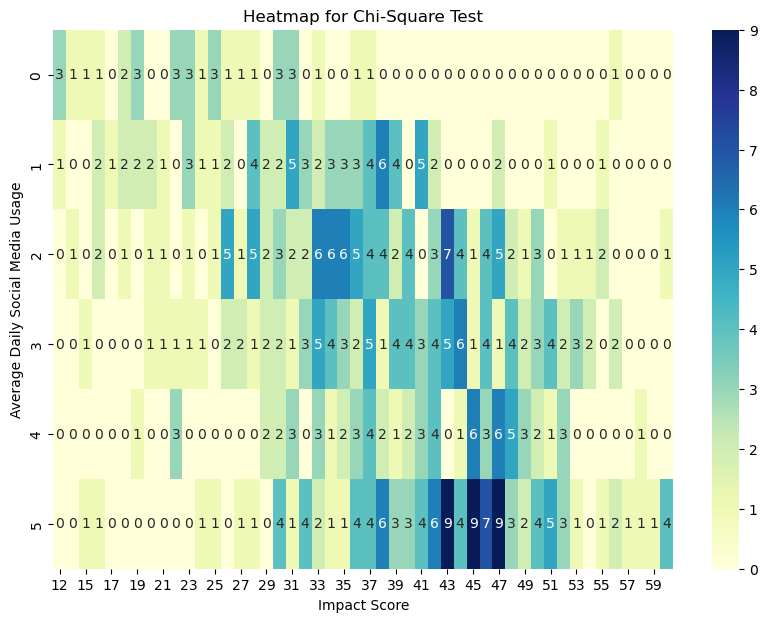

In [66]:
plt.figure(figsize=(10, 7))
sn.heatmap(usage_table, annot=True, cmap="YlGnBu")
plt.title('Heatmap for Chi-Square Test')
plt.show()

The above heatmap visualization shows how most high impact scores are associated with long hours of social media usage. As a reminder, 5 represents usage of usage media more than 5 hours daily.

#### Hypothesis 2

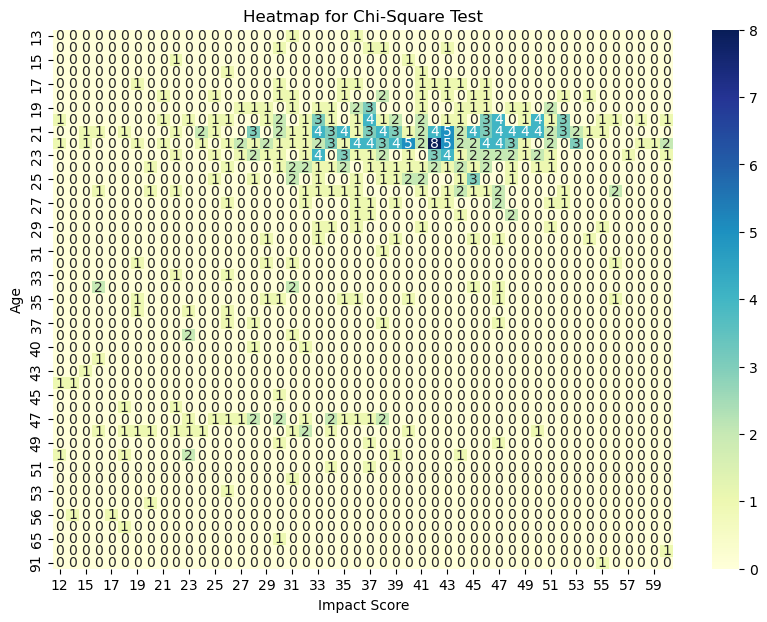

In [65]:
plt.figure(figsize=(10, 7))
sn.heatmap(age_table, annot=True, cmap="YlGnBu")
plt.title('Heatmap for Chi-Square Test')
plt.show()

The above heatmap visualization shows the distribution of impact Score among ages. We can notice that the highest impact scores are mostly associated with younger participants.

# 6) Summary

In this report, we have chosen a dataset gathered from a survey conducted by students from the University of Liberal Arts in Bangladesh. The dataset contains basic information about the participants such as their age, gender, affiliated organizations, relationship status along with their social media habits and their effects. 

We cleaned and pre-processed the dataset by replacing missing values, changing data types, and creating a new column that can help us get a tangible number on the impact of social media usage on the mental health of the participants. We have explored the dataset through different types of visualizations to analyze the patterns in the dataset and the correlations between the variables. We also conducted statistical analysis to draw conclusions about the data.

The findings from this report were that higher social media consumption has a more negative impact on the mental health of an individual, and younger individuals are more prone to the negative consequences of social media as they spend more time on it.

# 7) Reflection

One challenge encountered during this project was the choice of dataset. Not only, I did not want to choose a small or too simple dataset that did not require pre-processing, but I also did not take a difficult dataset due to the time limit and my limited knowledge. I took my time while searching for my dataset, and I picked a dataset that I found interesting and straightforward. Overall, I am satisfied with my work.

Further questions that we can explore are: Do social media platforms have different impact on the participants? Is there a social media platform that is worse than another one for the mental health of a participant?

# References

Kaggle dataset:
https://www.kaggle.com/datasets/souvikahmed071/social-media-and-mental-health/data